In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!pip install geopy

In [180]:
datasets=pd.read_csv("E:\Data science materials\SUPPLY_CHAIN_PROJECTS\YourCabs_training.csv")

In [181]:
df=datasets.copy()

In [182]:
df.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Car_Cancellation,Cost_of_error
0,132512,22177,28,NaN,2,83.0,448.0,NaN,NaN,1/1/2013 2:00,NaN,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,0,1.0
1,132513,21413,12,NaN,2,1010.0,540.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,0,1.0
2,132514,22178,12,NaN,2,1301.0,1034.0,NaN,NaN,1/1/2013 3:30,NaN,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,0,1.0
3,132515,13034,12,NaN,2,768.0,398.0,NaN,NaN,1/1/2013 5:45,NaN,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,0,1.0
4,132517,22180,12,NaN,2,1365.0,849.0,NaN,NaN,1/1/2013 9:00,NaN,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,0,1.0


In [183]:
df.isnull().sum()/len(df)*100

id                      0.000000
user_id                 0.000000
vehicle_model_id        0.000000
package_id             82.616104
travel_type_id          0.000000
from_area_id            0.202620
to_area_id             21.040271
from_city_id           62.365591
to_city_id             96.343626
from_date               0.000000
to_date                41.191775
online_booking          0.000000
mobile_site_booking     0.000000
booking_created         0.000000
from_lat                0.214133
from_long               0.214133
to_lat                 21.040271
to_long                21.040271
Car_Cancellation        0.000000
Cost_of_error           0.000000
dtype: float64

In [184]:
df.shape

(43431, 20)

# Data cleaning

In [185]:
# dropping the columns-- id,user_id
# vehicle_model (we need to convert into categorical variable)
# we have 82% null values in package id column but as we can see travel_type_id =3 has package id 2 , so we can bifurcate
# the data according to the travel type id.
# from_city_id and to_city_id have high null values , so we will drop it.
# transform the fromdate column and for to date , we can bifurcate acccording to the package id.
# drop the cost of error column


## Going with the whole data

In [186]:
target=df['Car_Cancellation']

In [187]:
df=df.drop(['id','user_id','package_id','to_area_id','from_city_id','to_city_id','to_date','Cost_of_error','Car_Cancellation'],axis=1)

In [188]:
df.head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,28,2,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750
1,12,2,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640
2,12,2,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766
3,12,2,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140
4,12,2,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720


In [189]:
df['from_lat']=df['from_lat'].fillna(df['from_lat'].median())

In [190]:
df['from_long']=df['from_long'].fillna(df['from_long'].median())

In [191]:
df.isnull().sum()

vehicle_model_id          0
travel_type_id            0
from_area_id             88
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 9138
to_long                9138
dtype: int64

In [192]:
df['from_area_id'] = df['from_area_id'].fillna(df[df['from_lat'] == df['from_lat'].median()]['from_area_id'].max())

In [193]:
df['to_lat']=df['to_lat'].fillna(df.groupby('from_area_id')['to_lat'].transform('median'))

In [194]:
df['to_long']=df['to_long'].fillna(df.groupby('from_area_id')['to_long'].transform('median'))

In [195]:
df.isnull().sum()

vehicle_model_id         0
travel_type_id           0
from_area_id             0
from_date                0
online_booking           0
mobile_site_booking      0
booking_created          0
from_lat                 0
from_long                0
to_lat                 105
to_long                105
dtype: int64

In [196]:
df[df['to_lat'].isnull()].head()

,vehicle_model_id,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
2158,54,1,483.0,1/25/2013 6:00,1,0,1/24/2013 15:32,12.953020,77.56333,NaN,NaN
3945,54,1,1397.0,2/10/2013 16:30,1,0,2/10/2013 13:26,12.968887,77.63575,NaN,NaN
4912,12,1,1397.0,2/23/2013 6:30,1,0,2/19/2013 21:29,12.968887,77.63575,NaN,NaN
5144,12,1,1397.0,2/22/2013 13:30,1,0,2/22/2013 10:22,12.968887,77.63575,NaN,NaN
5970,12,1,1397.0,3/4/2013 7:00,0,0,3/2/2013 17:48,12.968887,77.63575,NaN,NaN


In [197]:
df[df['to_lat'].isnull()]['from_area_id'].value_counts()

1397.0    90
1396.0     3
173.0      2
17.0       2
483.0      1
1215.0     1
1265.0     1
215.0      1
1080.0     1
802.0      1
1164.0     1
178.0      1
Name: from_area_id, dtype: int64

In [198]:
df['to_lat']=df['to_lat'].fillna(df['to_lat'].median())

In [199]:
df['to_long']=df['to_long'].fillna(df['to_long'].median())

In [200]:
df.isnull().sum()

vehicle_model_id       0
travel_type_id         0
from_area_id           0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
dtype: int64

# Data Transformation

In [201]:
df.shape

(43431, 11)

In [202]:
travel_type=pd.get_dummies(df['travel_type_id'],drop_first=True)
# One-hot encoding if number of distinct values is more than 5
# Label encoding if number of distict values is less than 5


In [203]:
travel_type.head()

,2,3
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [204]:
df=pd.concat([df,travel_type],axis=1)

In [205]:
df=df.drop(['travel_type_id'],axis=1)

In [206]:
df.rename(columns={2:'traveltype_point_to_point',3:'travel_type_hourly'},inplace=True)

In [207]:
df.head()

,vehicle_model_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,traveltype_point_to_point,travel_type_hourly
0,28,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,12.924150,77.672290,12.927320,77.635750,1,0
1,12,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,12.966910,77.749350,12.927680,77.626640,1,0
2,12,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,12.937222,77.626915,13.047926,77.597766,1,0
3,12,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,12.989990,77.553320,12.971430,77.639140,1,0
4,12,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,12.845653,77.677925,12.954340,77.600720,1,0


In [208]:
from geopy import distance
def cal_distance(from_lat,from_long,to_lat,to_long):
    return distance.distance((from_lat,from_long),(to_lat,to_long)).km

In [209]:
df['distance']=df.apply(lambda row : cal_distance(row['from_lat'],row['from_long'],row['to_lat'],row['to_long']),axis=1)

In [210]:
df=df.drop(['from_lat','from_long','to_lat','to_long'],axis=1)

In [211]:
df.head()

,vehicle_model_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_point_to_point,travel_type_hourly,distance
0,28,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,1,0,3.980687
1,12,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,1,0,14.004432
2,12,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,1,0,12.648909
3,12,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,1,0,9.534596
4,12,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,1,0,14.655467


In [212]:
df['from_date_date']=pd.to_datetime(df['from_date']).dt.strftime("%m/%d/%Y")
df['from_date_time']=pd.to_datetime(df['from_date']).dt.strftime("%H:%M") 

In [213]:
df['booking_created_date']=pd.to_datetime(df['booking_created']).dt.strftime('%m/%d/%Y')
df['booking_created_time']=pd.to_datetime(df['booking_created']).dt.strftime("%H:%M")

In [214]:
df['from_date_day']=pd.to_datetime(df['from_date_date']).dt.day_name()

In [215]:
df['from_date_month']=pd.to_datetime(df['from_date_date']).dt.month_name()
df['booking_created_day']=pd.to_datetime(df['booking_created_date']).dt.day_name()
df['booking_created_month']=pd.to_datetime(df['booking_created_date']).dt.month_name()

In [216]:
df['from_date_week']=np.where((df['from_date_day']=='Saturday') | (df['from_date_day']=='Sunday'),'Weekend','Weekday')

In [217]:
df['booking_created_week']=np.where((df['booking_created_day']=='Saturday') | 
                                    (df['booking_created_day']=='Sunday'),'Weekend','Weekday')

In [218]:
df.head()

,vehicle_model_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_point_to_point,travel_type_hourly,distance,from_date_date,from_date_time,booking_created_date,booking_created_time,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week
0,28,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,1,0,3.980687,01/01/2013,02:00,01/01/2013,01:39,Tuesday,January,Tuesday,January,Weekday,Weekday
1,12,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,1,0,14.004432,01/01/2013,09:00,01/01/2013,02:25,Tuesday,January,Tuesday,January,Weekday,Weekday
2,12,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,1,0,12.648909,01/01/2013,03:30,01/01/2013,03:08,Tuesday,January,Tuesday,January,Weekday,Weekday
3,12,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,1,0,9.534596,01/01/2013,05:45,01/01/2013,04:39,Tuesday,January,Tuesday,January,Weekday,Weekday
4,12,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,1,0,14.655467,01/01/2013,09:00,01/01/2013,07:53,Tuesday,January,Tuesday,January,Weekday,Weekday


In [219]:
cond=[(pd.to_datetime(df['from_date_time']).dt.hour.between(5,8)),
     (pd.to_datetime(df['from_date_time']).dt.hour.between(9,12)),
     (pd.to_datetime(df['from_date_time']).dt.hour.between(13,16)),
     (pd.to_datetime(df['from_date_time']).dt.hour.between(17,20)),
     (pd.to_datetime(df['from_date_time']).dt.hour.between(21,24)) | (pd.to_datetime(df['from_date_time']).dt.hour==0),
     (pd.to_datetime(df['from_date_time']).dt.hour.between(1,4))]
values=['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night']
df['from_date_session']=np.select(cond,values)

In [220]:
df.head()

,vehicle_model_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_point_to_point,travel_type_hourly,distance,from_date_date,from_date_time,booking_created_date,booking_created_time,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session
0,28,83.0,1/1/2013 2:00,0,0,1/1/2013 1:39,1,0,3.980687,01/01/2013,02:00,01/01/2013,01:39,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night
1,12,1010.0,1/1/2013 9:00,0,0,1/1/2013 2:25,1,0,14.004432,01/01/2013,09:00,01/01/2013,02:25,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning
2,12,1301.0,1/1/2013 3:30,0,0,1/1/2013 3:08,1,0,12.648909,01/01/2013,03:30,01/01/2013,03:08,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night
3,12,768.0,1/1/2013 5:45,0,0,1/1/2013 4:39,1,0,9.534596,01/01/2013,05:45,01/01/2013,04:39,Tuesday,January,Tuesday,January,Weekday,Weekday,Early_Morning
4,12,1365.0,1/1/2013 9:00,0,0,1/1/2013 7:53,1,0,14.655467,01/01/2013,09:00,01/01/2013,07:53,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning


In [221]:
cond1=[(pd.to_datetime(df['booking_created_time']).dt.hour.between(5,8)),
      (pd.to_datetime(df['booking_created_time']).dt.hour.between(9,12)),
      (pd.to_datetime(df['booking_created_time']).dt.hour.between(13,16)),
      (pd.to_datetime(df['booking_created_time']).dt.hour.between(17,20)),
      (pd.to_datetime(df['booking_created_time']).dt.hour.between(21,24)) | (pd.to_datetime(df['booking_created_time']).dt.hour==0),
      (pd.to_datetime(df['booking_created_time']).dt.hour.between(1,4))]
values=['Early_Morning','Morning','Afternoon','Evening','Night','Late_Night']
df['booking_created_session']=np.select(cond1,values)

In [222]:
df['time_diff']=(pd.to_datetime(df['from_date'])-pd.to_datetime(df['booking_created'])).astype('timedelta64[m]')

In [223]:
df[df['time_diff'] < 0].head()

,vehicle_model_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,traveltype_point_to_point,travel_type_hourly,distance,from_date_date,...,booking_created_time,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
1763,12,1298.0,1/20/2013 14:15,0,0,1/20/2013 15:01,0,1,8.482630,01/20/2013,...,15:01,Sunday,January,Sunday,January,Weekend,Weekend,Afternoon,Afternoon,-46.0
2990,28,393.0,2/1/2013 9:45,0,0,2/1/2013 13:18,0,1,28.576256,02/01/2013,...,13:18,Friday,February,Friday,February,Weekday,Weekday,Morning,Afternoon,-213.0
4228,12,571.0,2/13/2013 18:00,0,0,2/13/2013 18:29,0,1,5.866543,02/13/2013,...,18:29,Wednesday,February,Wednesday,February,Weekday,Weekday,Evening,Evening,-29.0
5303,12,1068.0,2/23/2013 18:00,0,0,2/23/2013 18:03,0,1,3.547502,02/23/2013,...,18:03,Saturday,February,Saturday,February,Weekend,Weekend,Evening,Evening,-3.0
6106,12,1010.0,3/4/2013 0:30,0,0,3/4/2013 2:00,0,1,10.133543,03/04/2013,...,02:00,Monday,March,Monday,March,Weekday,Weekday,Night,Late_Night,-90.0


In [224]:
df[df['time_diff'] < 0]['time_diff'].count()

42

In [225]:
df=df.drop(['from_date','booking_created','from_date_date','booking_created_date','from_date_time','booking_created_time'],
           axis=1)

In [226]:
df.head()

,vehicle_model_id,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff
0,28,83.0,0,0,1,0,3.980687,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,21.0
1,12,1010.0,0,0,1,0,14.004432,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Late_Night,395.0
2,12,1301.0,0,0,1,0,12.648909,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,22.0
3,12,768.0,0,0,1,0,9.534596,Tuesday,January,Tuesday,January,Weekday,Weekday,Early_Morning,Late_Night,66.0
4,12,1365.0,0,0,1,0,14.655467,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Early_Morning,67.0


In [227]:
df_merged=pd.concat([df,target],axis=1,join='inner')

In [228]:
df_merged.head()

,vehicle_model_id,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,Car_Cancellation
0,28,83.0,0,0,1,0,3.980687,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,21.0,0
1,12,1010.0,0,0,1,0,14.004432,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Late_Night,395.0,0
2,12,1301.0,0,0,1,0,12.648909,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,22.0,0
3,12,768.0,0,0,1,0,9.534596,Tuesday,January,Tuesday,January,Weekday,Weekday,Early_Morning,Late_Night,66.0,0
4,12,1365.0,0,0,1,0,14.655467,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Early_Morning,67.0,0


In [229]:
df['from_area_id_%']=round(df_merged.groupby('from_area_id')['Car_Cancellation'].sum()
                         /df_merged.groupby('from_area_id')['Car_Cancellation'].count(),2)

In [230]:
df['from_area_id_%'].replace(np.nan,0,inplace=True)

In [231]:
df.head()

,vehicle_model_id,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,from_area_id_%
0,28,83.0,0,0,1,0,3.980687,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,21.0,0.00
1,12,1010.0,0,0,1,0,14.004432,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Late_Night,395.0,0.00
2,12,1301.0,0,0,1,0,12.648909,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,22.0,0.13
3,12,768.0,0,0,1,0,9.534596,Tuesday,January,Tuesday,January,Weekday,Weekday,Early_Morning,Late_Night,66.0,0.00
4,12,1365.0,0,0,1,0,14.655467,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Early_Morning,67.0,0.00


In [232]:
cond2=[(df['from_area_id_%'].astype('float').between(0,0.33)),
      (df['from_area_id_%'].astype('float').between(0.34,0.66)),
      (df['from_area_id_%'].astype('float').between(0.67,1.0))]
values=['Low_Cancellation','Medium_Cancellation','High_Cancellation']
df['from_area_id_%']=np.select(cond2,values)

In [233]:
df.head()

,vehicle_model_id,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,time_diff,from_area_id_%
0,28,83.0,0,0,1,0,3.980687,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,21.0,Low_Cancellation
1,12,1010.0,0,0,1,0,14.004432,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Late_Night,395.0,Low_Cancellation
2,12,1301.0,0,0,1,0,12.648909,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,22.0,Low_Cancellation
3,12,768.0,0,0,1,0,9.534596,Tuesday,January,Tuesday,January,Weekday,Weekday,Early_Morning,Late_Night,66.0,Low_Cancellation
4,12,1365.0,0,0,1,0,14.655467,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Early_Morning,67.0,Low_Cancellation


# Data Visualisation

In [234]:
df['from_area_id_%'].value_counts()

Low_Cancellation       43415
Medium_Cancellation       11
High_Cancellation          5
Name: from_area_id_%, dtype: int64

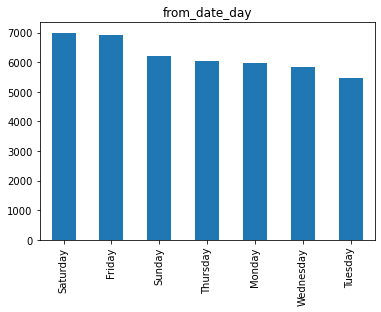

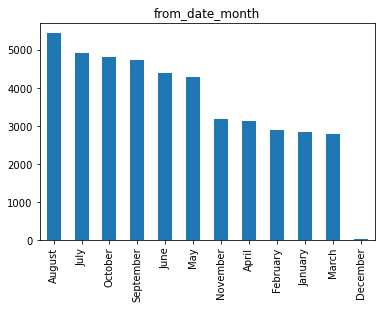

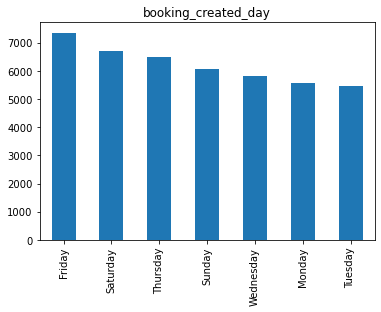

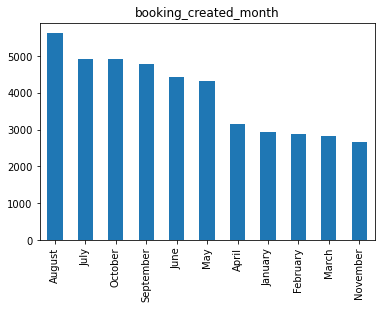

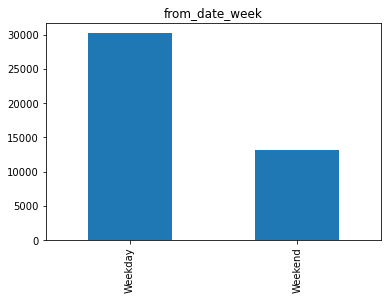

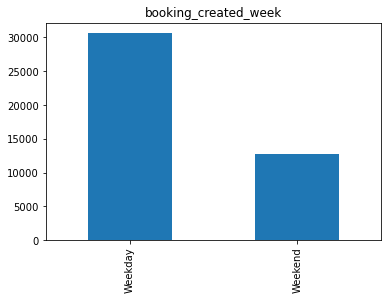

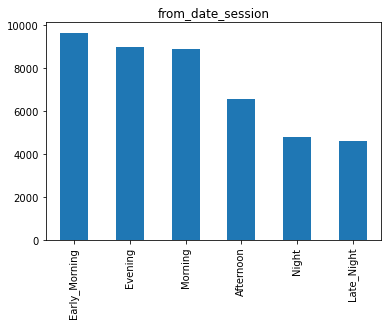

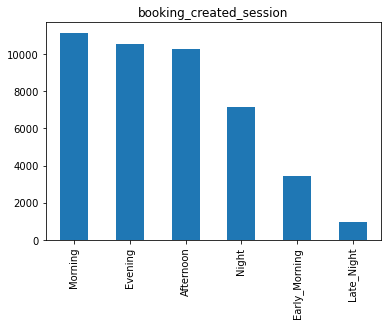

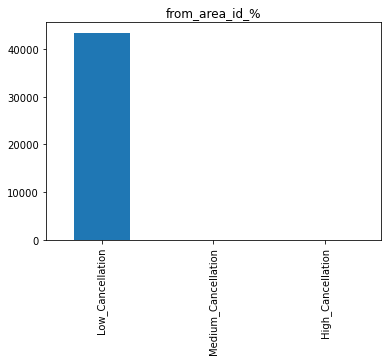

In [235]:
for col in df.columns:
    if df[col].dtype=='object':
        df[col].value_counts().plot.bar()
        plt.title(col)
        plt.show()

# data encoding

In [236]:
number=df.select_dtypes(include='number')
char=df.select_dtypes(include='object')

In [237]:
number.head()

,vehicle_model_id,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,time_diff
0,28,83.0,0,0,1,0,3.980687,21.0
1,12,1010.0,0,0,1,0,14.004432,395.0
2,12,1301.0,0,0,1,0,12.648909,22.0
3,12,768.0,0,0,1,0,9.534596,66.0
4,12,1365.0,0,0,1,0,14.655467,67.0


In [238]:
char.head()

,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,from_area_id_%
0,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,Low_Cancellation
1,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Late_Night,Low_Cancellation
2,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,Low_Cancellation
3,Tuesday,January,Tuesday,January,Weekday,Weekday,Early_Morning,Late_Night,Low_Cancellation
4,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Early_Morning,Low_Cancellation


In [239]:
X_merged_char=pd.concat([char,target],axis=1,join='inner')
X_merged_char.head()

,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session,from_area_id_%,Car_Cancellation
0,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,Low_Cancellation,0
1,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Late_Night,Low_Cancellation,0
2,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night,Low_Cancellation,0
3,Tuesday,January,Tuesday,January,Weekday,Weekday,Early_Morning,Late_Night,Low_Cancellation,0
4,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Early_Morning,Low_Cancellation,0


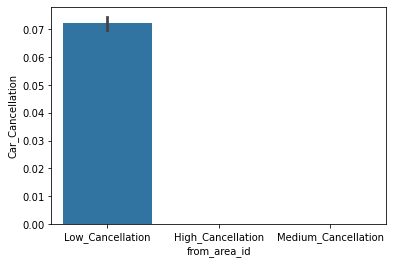

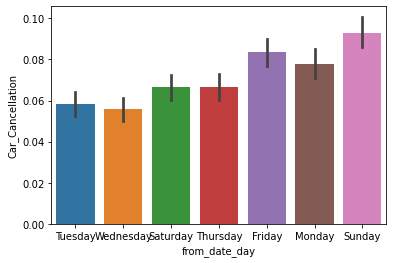

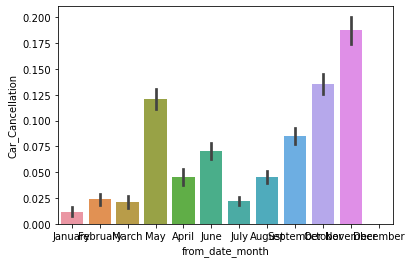

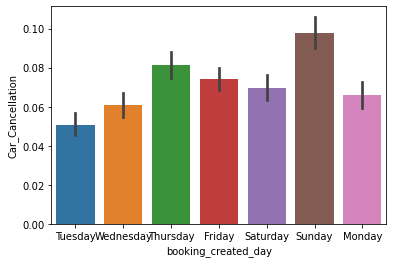

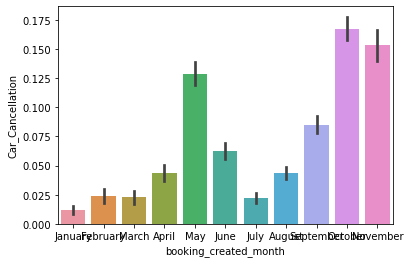

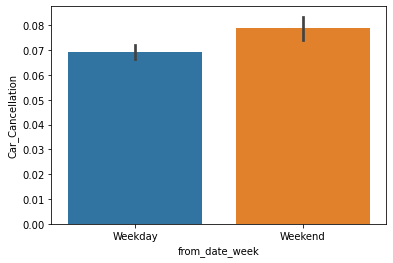

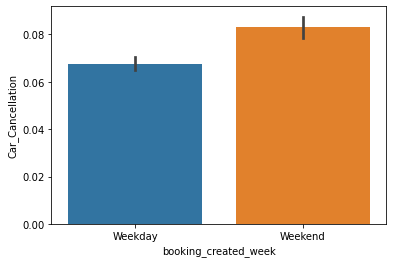

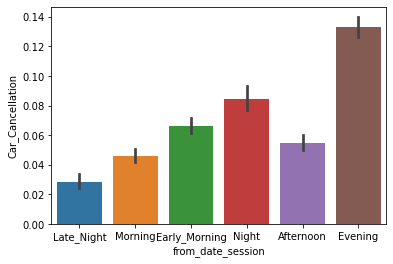

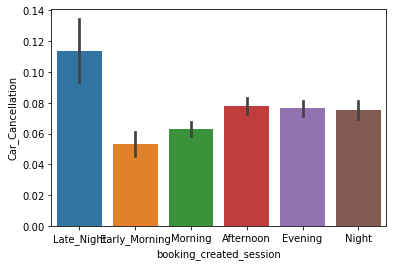

In [62]:
from numpy import mean

for col in char.columns:
    plt.figure()
    sns.barplot(x=col,y='Car_Cancellation',data=X_merged_char,estimator=mean)
    plt.show()

In [249]:
char=char.drop(['from_area_id_%'],axis=1)

In [250]:
char.head()

,from_date_day,from_date_month,booking_created_day,booking_created_month,from_date_week,booking_created_week,from_date_session,booking_created_session
0,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night
1,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Late_Night
2,Tuesday,January,Tuesday,January,Weekday,Weekday,Late_Night,Late_Night
3,Tuesday,January,Tuesday,January,Weekday,Weekday,Early_Morning,Late_Night
4,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,Early_Morning


In [245]:
X_char_dum=pd.get_dummies(char,drop_first=True)
X_char_dum.shape

(43431, 45)

In [246]:
X_char_dum.head()

,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,...,from_date_session_Early_Morning,from_date_session_Evening,from_date_session_Late_Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early_Morning,booking_created_session_Evening,booking_created_session_Late_Night,booking_created_session_Morning,booking_created_session_Night
0,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
2,0,0,0,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0


In [251]:
data_all=pd.concat([number,X_char_dum],axis=1,join='inner')

In [252]:
data_all.head()

,vehicle_model_id,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,time_diff,from_date_day_Monday,from_date_day_Saturday,...,from_date_session_Early_Morning,from_date_session_Evening,from_date_session_Late_Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early_Morning,booking_created_session_Evening,booking_created_session_Late_Night,booking_created_session_Morning,booking_created_session_Night
0,28,83.0,0,0,1,0,3.980687,21.0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,12,1010.0,0,0,1,0,14.004432,395.0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,12,1301.0,0,0,1,0,12.648909,22.0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,12,768.0,0,0,1,0,9.534596,66.0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,12,1365.0,0,0,1,0,14.655467,67.0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [253]:
data_all['vehicle_model_id'].value_counts()/len(data_all)

12    0.733554
85    0.055421
89    0.055053
65    0.044024
28    0.039189
24    0.034399
87    0.013009
90    0.007184
23    0.006838
86    0.002832
10    0.002395
64    0.001957
54    0.001681
17    0.000921
91    0.000576
30    0.000322
36    0.000207
13    0.000161
72    0.000046
1     0.000046
43    0.000046
14    0.000023
69    0.000023
76    0.000023
75    0.000023
70    0.000023
39    0.000023
Name: vehicle_model_id, dtype: float64

In [254]:
data_all=data_all.drop(['vehicle_model_id'],axis=1) # as single value has more percentage , can cause biasness

In [255]:
data_all.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,time_diff,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,...,from_date_session_Early_Morning,from_date_session_Evening,from_date_session_Late_Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early_Morning,booking_created_session_Evening,booking_created_session_Late_Night,booking_created_session_Morning,booking_created_session_Night
0,83.0,0,0,1,0,3.980687,21.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,1010.0,0,0,1,0,14.004432,395.0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
2,1301.0,0,0,1,0,12.648909,22.0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,768.0,0,0,1,0,9.534596,66.0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,1365.0,0,0,1,0,14.655467,67.0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


# Train validataion split

In [256]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data_all,target,train_size=0.80,random_state=101)

In [257]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(34744, 52)
(8687, 52)
(34744,)
(8687,)


In [258]:
X_train.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,time_diff,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,...,from_date_session_Early_Morning,from_date_session_Evening,from_date_session_Late_Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early_Morning,booking_created_session_Evening,booking_created_session_Late_Night,booking_created_session_Morning,booking_created_session_Night
39488,1397.0,1,0,0,0,2.744397,1211.0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
38986,572.0,0,0,1,0,32.629538,3746.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
40019,1038.0,0,0,1,0,12.212671,2247.0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
8297,1263.0,0,0,1,0,2.608123,448.0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16662,393.0,0,0,1,0,28.742469,368.0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [259]:
X_test.head()

,from_area_id,online_booking,mobile_site_booking,traveltype_point_to_point,travel_type_hourly,distance,time_diff,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,...,from_date_session_Early_Morning,from_date_session_Evening,from_date_session_Late_Night,from_date_session_Morning,from_date_session_Night,booking_created_session_Early_Morning,booking_created_session_Evening,booking_created_session_Late_Night,booking_created_session_Morning,booking_created_session_Night
1789,292.0,0,0,1,0,4.564707,729.0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
15553,1083.0,0,0,1,0,8.609216,160.0,0,0,0,...,0,0,0,0,1,0,1,0,0,0
37194,296.0,0,0,1,0,28.316157,864.0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
42474,391.0,0,0,1,0,7.267920,22.0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
11257,393.0,0,1,1,0,39.035401,223.0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


# model_selection

In [260]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(random_state=101)
lg.fit(X_train,y_train)

C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=101)

In [261]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(random_state=101,criterion='gini')

In [262]:
from sklearn.model_selection import GridSearchCV
param_dist={'max_depth':[3,5,6,7],'min_samples_split':[50,100,150,200,250]}
gscv_dtc=GridSearchCV(dt,cv=10,param_grid=param_dist,n_jobs=-1)
gscv_dtc.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 6, 7],
                         'min_samples_split': [50, 100, 150, 200, 250]})

In [263]:
gscv_dtc.best_params_

{'max_depth': 5, 'min_samples_split': 100}

In [264]:
dt_model=DecisionTreeClassifier(random_state=101,min_samples_split=100,max_depth=5,criterion='gini')
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=100, random_state=101)

In [265]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(random_state=101,criterion='gini')

In [266]:
from sklearn.model_selection import GridSearchCV
param_dist={'min_samples_split':[3,5,6,7],'max_depth':[50,100,150,200,250]}
gscv_rf=GridSearchCV(rf,param_dist,cv=10,n_jobs=-1)
gscv_rf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [50, 100, 150, 200, 250],
                         'min_samples_split': [3, 5, 6, 7]})

In [267]:
gscv_rf.best_params_

{'max_depth': 50, 'min_samples_split': 7}

In [268]:
rf_model=RandomForestClassifier(criterion='gini',random_state=101,max_depth=50,min_samples_split=7)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, min_samples_split=7, random_state=101)

# Model_Evaluation

In [269]:
lg_predict=lg.predict(X_test)
dt_model_predict=dt_model.predict(X_test)
rf_model_predict=rf_model.predict(X_test)

In [272]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

In [271]:
# Prediction for the training data
lg_predict_train=lg.predict(X_train)
dt_predict_train=dt_model.predict(X_train)
rf_predict_train=rf_model.predict(X_train)

In [274]:
# Accuracy for the trianing data by logistic model
from sklearn.metrics import accuracy_score
print(accuracy_score(y_train,lg_predict_train))

0.9273255813953488


In [275]:
print("Accuracy:",metrics.accuracy_score(y_test,lg_predict))
print("Precision",metrics.precision_score(y_test,lg_predict))
print("Recall",metrics.recall_score(y_test,lg_predict))
print("f1_score",metrics.f1_score(y_test,lg_predict))

Accuracy: 0.9286289858409117
Precision 0.45794392523364486
Recall 0.08019639934533551
f1_score 0.13649025069637882


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


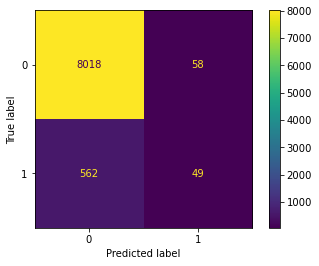

In [276]:
metrics.plot_confusion_matrix(lg,X_test,y_test)

In [277]:
# accuracy for the training data by decision tree model
print(accuracy_score(y_train,dt_predict_train))

0.9321897306009671


In [278]:
print("Accuracy:",metrics.accuracy_score(y_test,dt_model_predict))
print("Precision",metrics.precision_score(y_test,dt_model_predict))
print("Recall",metrics.recall_score(y_test,dt_model_predict))
print("f1_score",metrics.f1_score(y_test,dt_model_predict))

Accuracy: 0.9328882237826638
Precision 0.7258064516129032
Recall 0.07364975450081833
f1_score 0.1337295690936107


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


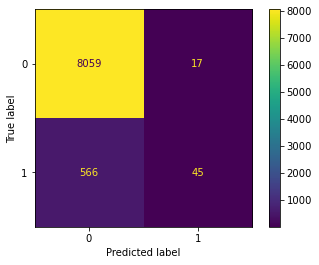

In [279]:
metrics.plot_confusion_matrix(dt_model,X_test,y_test)

In [280]:
# accuracy of training data by random forest
print(accuracy_score(y_train,rf_predict_train))

0.9621805203776191


In [281]:
print("Accuracy:",metrics.accuracy_score(y_test,rf_model_predict))
print("Precision",metrics.precision_score(y_test,rf_model_predict))
print("Recall",metrics.recall_score(y_test,rf_model_predict))
print("f1_score",metrics.f1_score(y_test,rf_model_predict))

Accuracy: 0.9377230344192472
Precision 0.6902173913043478
Recall 0.2078559738134206
f1_score 0.319496855345912


C:\Users\ADMIN\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


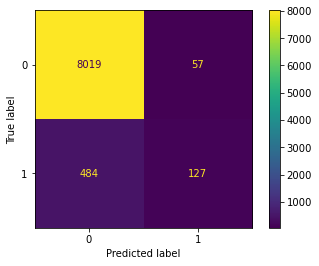

In [282]:
metrics.plot_confusion_matrix(rf_model,X_test,y_test)

## random forest have the highest accuracy, so we will predict the new data with this model only

# Prediction for the real data

In [283]:
new_data=pd.read_csv(r"E:\Data science materials\SUPPLY_CHAIN_PROJECTS\YourCabs_score.csv")

In [284]:
new_data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,to_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Unnamed: 18,Unnamed: 19
0,132516,22179,12,NaN,2,1096.0,393.0,NaN,NaN,1/1/2013 9:30,NaN,0,0,1/1/2013 7:51,12.965190,77.719320,13.19956,77.70688,NaN,NaN
1,132529,22187,65,NaN,2,1061.0,393.0,NaN,NaN,1/2/2013 1:00,NaN,0,0,1/1/2013 12:11,12.924878,77.566255,13.19956,77.70688,NaN,NaN
2,132532,23180,12,NaN,2,1192.0,353.0,NaN,NaN,1/2/2013 4:30,NaN,0,0,1/1/2013 12:22,12.976770,77.572700,13.03241,77.59914,NaN,NaN
3,132547,30849,12,NaN,2,515.0,849.0,NaN,NaN,1/1/2013 20:15,NaN,0,0,1/1/2013 16:51,12.978960,77.673450,12.95434,77.60072,NaN,NaN
4,132548,22198,12,NaN,2,83.0,463.0,NaN,NaN,1/3/2013 0:30,NaN,0,0,1/1/2013 17:04,12.924150,77.672290,12.96037,77.58132,NaN,NaN


In [285]:
# checking null values
new_data.isnull().sum()/len(new_data)

id                     0.0000
user_id                0.0000
vehicle_model_id       0.0000
package_id             0.8215
travel_type_id         0.0000
from_area_id           0.0020
to_area_id             0.2150
from_city_id           0.6288
to_city_id             0.9635
from_date              0.0000
to_date                0.4127
online_booking         0.0000
mobile_site_booking    0.0000
booking_created        0.0000
from_lat               0.0020
from_long              0.0020
to_lat                 0.2150
to_long                0.2150
Unnamed: 18            1.0000
Unnamed: 19            1.0000
dtype: float64

In [286]:
# dropping the columns
new_data=new_data.drop(['id','user_id','package_id','vehicle_model_id','to_area_id','from_city_id','to_city_id','to_date',
                       'Unnamed: 18','Unnamed: 19'],axis=1)

In [287]:
new_data.head()

,travel_type_id,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long
0,2,1096.0,1/1/2013 9:30,0,0,1/1/2013 7:51,12.965190,77.719320,13.19956,77.70688
1,2,1061.0,1/2/2013 1:00,0,0,1/1/2013 12:11,12.924878,77.566255,13.19956,77.70688
2,2,1192.0,1/2/2013 4:30,0,0,1/1/2013 12:22,12.976770,77.572700,13.03241,77.59914
3,2,515.0,1/1/2013 20:15,0,0,1/1/2013 16:51,12.978960,77.673450,12.95434,77.60072
4,2,83.0,1/3/2013 0:30,0,0,1/1/2013 17:04,12.924150,77.672290,12.96037,77.58132


In [288]:
new_data.isnull().sum()

travel_type_id            0
from_area_id             20
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                 20
from_long                20
to_lat                 2150
to_long                2150
dtype: int64

In [289]:
new_data['from_lat']=new_data['from_lat'].fillna(new_data['from_lat'].median())
new_data['from_long']=new_data['from_long'].fillna(new_data['from_long'].median())

In [290]:
new_data.isnull().sum()

travel_type_id            0
from_area_id             20
from_date                 0
online_booking            0
mobile_site_booking       0
booking_created           0
from_lat                  0
from_long                 0
to_lat                 2150
to_long                2150
dtype: int64

In [291]:
new_data['from_area_id']=new_data['from_area_id'].fillna(new_data[new_data['to_lat']==new_data['to_lat'].median()]
                                                         ['from_area_id'].max())

In [292]:
new_data['to_lat']=new_data['to_lat'].fillna(new_data.groupby('from_area_id')['to_lat'].transform('median'))

In [293]:
new_data['to_long']=new_data['to_long'].fillna(new_data.groupby('from_area_id')['to_long'].transform('median'))

In [294]:
new_data.isnull().sum()

travel_type_id          0
from_area_id            0
from_date               0
online_booking          0
mobile_site_booking     0
booking_created         0
from_lat                0
from_long               0
to_lat                 26
to_long                26
dtype: int64

In [295]:
new_data['to_long']=new_data['to_long'].fillna(new_data['to_long'].median())
new_data['to_lat']=new_data['to_lat'].fillna(new_data['to_lat'].median())

In [296]:
new_data.isnull().sum()

travel_type_id         0
from_area_id           0
from_date              0
online_booking         0
mobile_site_booking    0
booking_created        0
from_lat               0
from_long              0
to_lat                 0
to_long                0
dtype: int64

In [297]:
travel_type=pd.get_dummies(new_data['travel_type_id'],drop_first=True)

In [298]:
new_data=pd.concat([new_data,travel_type],axis=1)

In [299]:
new_data=new_data.drop(['travel_type_id'],axis=1)

In [300]:
new_data.rename(columns={2:'travel_point_to_point',3:'travel_type_hourly'},inplace=True)

In [301]:
new_data.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,travel_point_to_point,travel_type_hourly
0,1096.0,1/1/2013 9:30,0,0,1/1/2013 7:51,12.965190,77.719320,13.19956,77.70688,1,0
1,1061.0,1/2/2013 1:00,0,0,1/1/2013 12:11,12.924878,77.566255,13.19956,77.70688,1,0
2,1192.0,1/2/2013 4:30,0,0,1/1/2013 12:22,12.976770,77.572700,13.03241,77.59914,1,0
3,515.0,1/1/2013 20:15,0,0,1/1/2013 16:51,12.978960,77.673450,12.95434,77.60072,1,0
4,83.0,1/3/2013 0:30,0,0,1/1/2013 17:04,12.924150,77.672290,12.96037,77.58132,1,0


In [302]:
new_data['distance']=new_data.apply(lambda row: cal_distance(row['from_lat'],row['from_long'],
                                                             row['to_lat'],row['to_long']),axis=1)

In [303]:
new_data=new_data.drop(['from_lat','from_long','to_long','to_lat'],axis=1)

In [304]:
new_data.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,travel_point_to_point,travel_type_hourly,distance
0,1096.0,1/1/2013 9:30,0,0,1/1/2013 7:51,1,0,25.963706
1,1061.0,1/2/2013 1:00,0,0,1/1/2013 12:11,1,0,34.001036
2,1192.0,1/2/2013 4:30,0,0,1/1/2013 12:22,1,0,6.790951
3,515.0,1/1/2013 20:15,0,0,1/1/2013 16:51,1,0,8.347985
4,83.0,1/3/2013 0:30,0,0,1/1/2013 17:04,1,0,10.653426


In [305]:
new_data['time_diff']=(pd.to_datetime(new_data['from_date'])-
pd.to_datetime(new_data['booking_created'])).astype('timedelta64[m]')

In [306]:
new_data['from_data_date']=pd.to_datetime(new_data['from_date']).dt.strftime("%m/%d/%Y")
new_data['from_date_time']=pd.to_datetime(new_data['from_date']).dt.strftime("%H:%M")

In [307]:
new_data['booking_created_date']=pd.to_datetime(new_data['booking_created']).dt.strftime("%m/%d/%Y")
new_data['booking_created_time']=pd.to_datetime(new_data['booking_created']).dt.strftime("%H:%M")

In [308]:
new_data.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,travel_point_to_point,travel_type_hourly,distance,time_diff,from_data_date,from_date_time,booking_created_date,booking_created_time
0,1096.0,1/1/2013 9:30,0,0,1/1/2013 7:51,1,0,25.963706,99.0,01/01/2013,09:30,01/01/2013,07:51
1,1061.0,1/2/2013 1:00,0,0,1/1/2013 12:11,1,0,34.001036,769.0,01/02/2013,01:00,01/01/2013,12:11
2,1192.0,1/2/2013 4:30,0,0,1/1/2013 12:22,1,0,6.790951,968.0,01/02/2013,04:30,01/01/2013,12:22
3,515.0,1/1/2013 20:15,0,0,1/1/2013 16:51,1,0,8.347985,204.0,01/01/2013,20:15,01/01/2013,16:51
4,83.0,1/3/2013 0:30,0,0,1/1/2013 17:04,1,0,10.653426,1886.0,01/03/2013,00:30,01/01/2013,17:04


In [309]:
new_data['from_date_day']=pd.to_datetime(new_data['from_date']).dt.day_name()

In [310]:
new_data['from_date_month']=pd.to_datetime(new_data['from_date']).dt.month_name()

In [311]:
new_data['booking_day']=pd.to_datetime(new_data['booking_created']).dt.day_name()
new_data['booking_month']=pd.to_datetime(new_data['booking_created']).dt.month_name()

In [312]:
new_data.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,travel_point_to_point,travel_type_hourly,distance,time_diff,from_data_date,from_date_time,booking_created_date,booking_created_time,from_date_day,from_date_month,booking_day,booking_month
0,1096.0,1/1/2013 9:30,0,0,1/1/2013 7:51,1,0,25.963706,99.0,01/01/2013,09:30,01/01/2013,07:51,Tuesday,January,Tuesday,January
1,1061.0,1/2/2013 1:00,0,0,1/1/2013 12:11,1,0,34.001036,769.0,01/02/2013,01:00,01/01/2013,12:11,Wednesday,January,Tuesday,January
2,1192.0,1/2/2013 4:30,0,0,1/1/2013 12:22,1,0,6.790951,968.0,01/02/2013,04:30,01/01/2013,12:22,Wednesday,January,Tuesday,January
3,515.0,1/1/2013 20:15,0,0,1/1/2013 16:51,1,0,8.347985,204.0,01/01/2013,20:15,01/01/2013,16:51,Tuesday,January,Tuesday,January
4,83.0,1/3/2013 0:30,0,0,1/1/2013 17:04,1,0,10.653426,1886.0,01/03/2013,00:30,01/01/2013,17:04,Thursday,January,Tuesday,January


In [313]:
new_data['booking_creatted_week']=np.where(((new_data['booking_day']=='Sunday') | 
                                           (new_data['booking_day']=='Saturday')),'Weekend','Weekday')

In [314]:
new_data['from_date_week']=np.where((new_data['from_date_day']=='Sunday') |
                                   (new_data['from_date_day']=='Saturday'),'Weekend','Weekday')

In [315]:
new_data.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,travel_point_to_point,travel_type_hourly,distance,time_diff,from_data_date,from_date_time,booking_created_date,booking_created_time,from_date_day,from_date_month,booking_day,booking_month,booking_creatted_week,from_date_week
0,1096.0,1/1/2013 9:30,0,0,1/1/2013 7:51,1,0,25.963706,99.0,01/01/2013,09:30,01/01/2013,07:51,Tuesday,January,Tuesday,January,Weekday,Weekday
1,1061.0,1/2/2013 1:00,0,0,1/1/2013 12:11,1,0,34.001036,769.0,01/02/2013,01:00,01/01/2013,12:11,Wednesday,January,Tuesday,January,Weekday,Weekday
2,1192.0,1/2/2013 4:30,0,0,1/1/2013 12:22,1,0,6.790951,968.0,01/02/2013,04:30,01/01/2013,12:22,Wednesday,January,Tuesday,January,Weekday,Weekday
3,515.0,1/1/2013 20:15,0,0,1/1/2013 16:51,1,0,8.347985,204.0,01/01/2013,20:15,01/01/2013,16:51,Tuesday,January,Tuesday,January,Weekday,Weekday
4,83.0,1/3/2013 0:30,0,0,1/1/2013 17:04,1,0,10.653426,1886.0,01/03/2013,00:30,01/01/2013,17:04,Thursday,January,Tuesday,January,Weekday,Weekday


In [316]:
cond_1=[(pd.to_datetime(new_data['from_date_time']).dt.hour.between(1,4)),
        (pd.to_datetime(new_data['from_date_time']).dt.hour.between(5,8)),
        (pd.to_datetime(new_data['from_date_time']).dt.hour.between(9,12)),
        (pd.to_datetime(new_data['from_date_time']).dt.hour.between(13,16)),
        (pd.to_datetime(new_data['from_date_time']).dt.hour.between(17,20)),
        (pd.to_datetime(new_data['from_date_time']).dt.hour.between(21,24)) | 
        (pd.to_datetime(new_data['from_date_time']).dt.hour==0)]
value=['LateNight','EarlyMorning','Morning','Afternoon','Evening','Night']
new_data['from_date_session']=np.select(cond_1,value)

In [317]:
cond_2=[(pd.to_datetime(new_data['booking_created_time']).dt.hour.between(1,4)),
       (pd.to_datetime(new_data['booking_created_time']).dt.hour.between(5,8)),
       (pd.to_datetime(new_data['booking_created_time']).dt.hour.between(9,12)),
       (pd.to_datetime(new_data['booking_created_time']).dt.hour.between(13,16)),
       (pd.to_datetime(new_data['booking_created_time']).dt.hour.between(17,20)),
       (pd.to_datetime(new_data['booking_created_time']).dt.hour.between(21,24)) |
       (pd.to_datetime(new_data['booking_created_time']).dt.hour==0)]
value=['LateNight','EarlyMorning','Morning','Afternoon','Evening','Night']
new_data['Booking_created_session']=np.select(cond_2,value)

In [318]:
new_data.head()

,from_area_id,from_date,online_booking,mobile_site_booking,booking_created,travel_point_to_point,travel_type_hourly,distance,time_diff,from_data_date,...,booking_created_date,booking_created_time,from_date_day,from_date_month,booking_day,booking_month,booking_creatted_week,from_date_week,from_date_session,Booking_created_session
0,1096.0,1/1/2013 9:30,0,0,1/1/2013 7:51,1,0,25.963706,99.0,01/01/2013,...,01/01/2013,07:51,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,EarlyMorning
1,1061.0,1/2/2013 1:00,0,0,1/1/2013 12:11,1,0,34.001036,769.0,01/02/2013,...,01/01/2013,12:11,Wednesday,January,Tuesday,January,Weekday,Weekday,LateNight,Morning
2,1192.0,1/2/2013 4:30,0,0,1/1/2013 12:22,1,0,6.790951,968.0,01/02/2013,...,01/01/2013,12:22,Wednesday,January,Tuesday,January,Weekday,Weekday,LateNight,Morning
3,515.0,1/1/2013 20:15,0,0,1/1/2013 16:51,1,0,8.347985,204.0,01/01/2013,...,01/01/2013,16:51,Tuesday,January,Tuesday,January,Weekday,Weekday,Evening,Afternoon
4,83.0,1/3/2013 0:30,0,0,1/1/2013 17:04,1,0,10.653426,1886.0,01/03/2013,...,01/01/2013,17:04,Thursday,January,Tuesday,January,Weekday,Weekday,Night,Evening


In [319]:
new_number=new_data.select_dtypes(include='number')

In [320]:
new_char=new_data.select_dtypes(include='object')

In [321]:
new_number.head()

,from_area_id,online_booking,mobile_site_booking,travel_point_to_point,travel_type_hourly,distance,time_diff
0,1096.0,0,0,1,0,25.963706,99.0
1,1061.0,0,0,1,0,34.001036,769.0
2,1192.0,0,0,1,0,6.790951,968.0
3,515.0,0,0,1,0,8.347985,204.0
4,83.0,0,0,1,0,10.653426,1886.0


In [322]:
new_char.head()

,from_date,booking_created,from_data_date,from_date_time,booking_created_date,booking_created_time,from_date_day,from_date_month,booking_day,booking_month,booking_creatted_week,from_date_week,from_date_session,Booking_created_session
0,1/1/2013 9:30,1/1/2013 7:51,01/01/2013,09:30,01/01/2013,07:51,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,EarlyMorning
1,1/2/2013 1:00,1/1/2013 12:11,01/02/2013,01:00,01/01/2013,12:11,Wednesday,January,Tuesday,January,Weekday,Weekday,LateNight,Morning
2,1/2/2013 4:30,1/1/2013 12:22,01/02/2013,04:30,01/01/2013,12:22,Wednesday,January,Tuesday,January,Weekday,Weekday,LateNight,Morning
3,1/1/2013 20:15,1/1/2013 16:51,01/01/2013,20:15,01/01/2013,16:51,Tuesday,January,Tuesday,January,Weekday,Weekday,Evening,Afternoon
4,1/3/2013 0:30,1/1/2013 17:04,01/03/2013,00:30,01/01/2013,17:04,Thursday,January,Tuesday,January,Weekday,Weekday,Night,Evening


In [323]:
new_char=new_char.drop(['from_date','booking_created','from_data_date','from_date_time','booking_created_date',
                       'booking_created_time'],axis=1)

In [324]:
new_char.head()

,from_date_day,from_date_month,booking_day,booking_month,booking_creatted_week,from_date_week,from_date_session,Booking_created_session
0,Tuesday,January,Tuesday,January,Weekday,Weekday,Morning,EarlyMorning
1,Wednesday,January,Tuesday,January,Weekday,Weekday,LateNight,Morning
2,Wednesday,January,Tuesday,January,Weekday,Weekday,LateNight,Morning
3,Tuesday,January,Tuesday,January,Weekday,Weekday,Evening,Afternoon
4,Thursday,January,Tuesday,January,Weekday,Weekday,Night,Evening


In [325]:
# encoding
X_new_char=pd.get_dummies(new_char,drop_first=True)

In [326]:
X_new_char.head()

,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,from_date_day_Thursday,from_date_day_Tuesday,from_date_day_Wednesday,from_date_month_August,from_date_month_December,from_date_month_February,from_date_month_January,...,from_date_session_EarlyMorning,from_date_session_Evening,from_date_session_LateNight,from_date_session_Morning,from_date_session_Night,Booking_created_session_EarlyMorning,Booking_created_session_Evening,Booking_created_session_LateNight,Booking_created_session_Morning,Booking_created_session_Night
0,0,0,0,0,1,0,0,0,0,1,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,1,...,0,0,1,0,0,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [327]:
new_test_data=pd.concat([new_number,X_new_char],axis=1)

In [328]:
new_test_data.head()

,from_area_id,online_booking,mobile_site_booking,travel_point_to_point,travel_type_hourly,distance,time_diff,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,...,from_date_session_EarlyMorning,from_date_session_Evening,from_date_session_LateNight,from_date_session_Morning,from_date_session_Night,Booking_created_session_EarlyMorning,Booking_created_session_Evening,Booking_created_session_LateNight,Booking_created_session_Morning,Booking_created_session_Night
0,1096.0,0,0,1,0,25.963706,99.0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,1061.0,0,0,1,0,34.001036,769.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,1192.0,0,0,1,0,6.790951,968.0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3,515.0,0,0,1,0,8.347985,204.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,83.0,0,0,1,0,10.653426,1886.0,0,0,0,...,0,0,0,0,1,0,1,0,0,0


# Prediction with random forest model

In [333]:
import warnings
warnings.filterwarnings("ignore")
Target=rf_model.predict(new_test_data)

In [341]:
Target=pd.DataFrame(data=Target)

In [343]:
Target.rename(columns={0:'Car_cancellation'},inplace=True)

In [344]:
Target.head()

,Car_cancellation
0,0
1,0
2,0
3,0
4,0


In [347]:
new_data_target=pd.concat([new_test_data,Target],axis=1)

In [348]:
new_data_target.head()

,from_area_id,online_booking,mobile_site_booking,travel_point_to_point,travel_type_hourly,distance,time_diff,from_date_day_Monday,from_date_day_Saturday,from_date_day_Sunday,...,from_date_session_Evening,from_date_session_LateNight,from_date_session_Morning,from_date_session_Night,Booking_created_session_EarlyMorning,Booking_created_session_Evening,Booking_created_session_LateNight,Booking_created_session_Morning,Booking_created_session_Night,Car_cancellation
0,1096.0,0,0,1,0,25.963706,99.0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
1,1061.0,0,0,1,0,34.001036,769.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
2,1192.0,0,0,1,0,6.790951,968.0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
3,515.0,0,0,1,0,8.347985,204.0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,83.0,0,0,1,0,10.653426,1886.0,0,0,0,...,0,0,0,1,0,1,0,0,0,0


In [349]:
# appending the output to the original new data
new_data=pd.read_csv(r"E:\Data science materials\SUPPLY_CHAIN_PROJECTS\YourCabs_score.csv")

In [350]:
final_new_data=pd.concat([new_data,Target],axis=1)

In [352]:
final_new_data.head()

,id,user_id,vehicle_model_id,package_id,travel_type_id,from_area_id,to_area_id,from_city_id,to_city_id,from_date,...,online_booking,mobile_site_booking,booking_created,from_lat,from_long,to_lat,to_long,Unnamed: 18,Unnamed: 19,Car_cancellation
0,132516,22179,12,NaN,2,1096.0,393.0,NaN,NaN,1/1/2013 9:30,...,0,0,1/1/2013 7:51,12.965190,77.719320,13.19956,77.70688,NaN,NaN,0
1,132529,22187,65,NaN,2,1061.0,393.0,NaN,NaN,1/2/2013 1:00,...,0,0,1/1/2013 12:11,12.924878,77.566255,13.19956,77.70688,NaN,NaN,0
2,132532,23180,12,NaN,2,1192.0,353.0,NaN,NaN,1/2/2013 4:30,...,0,0,1/1/2013 12:22,12.976770,77.572700,13.03241,77.59914,NaN,NaN,0
3,132547,30849,12,NaN,2,515.0,849.0,NaN,NaN,1/1/2013 20:15,...,0,0,1/1/2013 16:51,12.978960,77.673450,12.95434,77.60072,NaN,NaN,0
4,132548,22198,12,NaN,2,83.0,463.0,NaN,NaN,1/3/2013 0:30,...,0,0,1/1/2013 17:04,12.924150,77.672290,12.96037,77.58132,NaN,NaN,0


In [353]:
final_new_data.to_csv('new_data_with_output.csv')